# Indian Car Classifier

The aim of this notebook is to create a car classifier which will classify most of the popular indian cars. I did some research on popular cars in India and I came across a list of 20 popular cars in India. The classifier is created using fastai which is a wrapper built on top of Pytorch.  
To know more about fastai I would recommend reading the [docs](https://docs.fast.ai/) or going the [course](https://course.fast.ai/)  
  
This model is trained on a GCP instance with Nvidia P4 GPU. To know more about how to create this instance refer this [link](https://course.fast.ai/start_gcp.html)

### Loading the data set

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

Data set is created is using a library named `google_images_download`. You can pip install this library by using the below command.  
`$ pip install google_images_download`  
Once the command runs successfully run the below 4 commands. I have a very weak internet connection so I have divided the command into 4 different parts. You can download all the images in one go.  
`googleimagesdownload --limit 100 --keywords "Hyundai Creta, Mahindra Scorpio, Hyundai Elite i20, Maruti Dzire" --format jpg -o "C:\Images"  
googleimagesdownload --limit 100 --keywords "Renault Kwid, Toyota Fortuner, Toyota Innova, Maruti Ertiga" --format jpg -o "C:\Images" 
googleimagesdownload --limit 100 --keywords "Mahindra Bolero, Hyundai Grand i10, Honda Amaze, Hyundai Verna, Honda City" --format jpg -o "C:\Images"  
googleimagesdownload --limit 100 --keywords "Maruti Celerio, Ford Ecosport, Maruti Ciaz" --format jpg -o "C:\Images"` 
  
To know more about this library ,refer this [github](https://github.com/hardikvasa/google-images-download) link.  
  
Once all the images are downloaded. I manually went thorugh all the images and removed the images that i did not think belonged to that particular category. 

In [3]:
path = Path('/home/jupyter/work/data/indian-car-classifier/')
path.ls()

[PosixPath('/home/jupyter/work/data/indian-car-classifier/maruti-wagonr'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/maruti-baleno'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/test-images'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/hyundai-creta'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/renault-kwid'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/cleaned.csv'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/maruti-celerio'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/ford-ecosport'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/honda-city'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/maruti-ertiga'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/mahindra-scorpio'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/hyundai-verna'),
 PosixPath('/home/jupyter/work/data/indian-car-classifier/commands.txt'),
 PosixPath('/home/jupyter/work

In [4]:
classes = ['maruti-baleno','maruti-swift','maruti-wagonr', 'maruti-vitara-breeza', 'hyundai-creta', 'mahindra-scorpio'
          , 'hyundai-elite-i20', 'maruti-dzire', 'renault-kwid', 'toyota-fortuner', 'toyota-innova', 'maruti-ertiga'
          , 'mahindra-bolero', 'hyundai-grand-i10', 'honda-amaze', 'hyundai-verna', 'honda-city']

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

maruti-baleno


maruti-swift


maruti-wagonr


maruti-vitara-breeza


hyundai-creta


mahindra-scorpio


hyundai-elite-i20


maruti-dzire


renault-kwid


toyota-fortuner


toyota-innova


maruti-ertiga


mahindra-bolero


hyundai-grand-i10


honda-amaze


hyundai-verna


honda-city


### Training with Resnet 34

In [6]:
np.random.seed(34)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['ford-ecosport',
 'honda-amaze',
 'honda-city',
 'hyundai-creta',
 'hyundai-elite-i20',
 'hyundai-grand-i10',
 'hyundai-verna',
 'mahindra-bolero',
 'mahindra-scorpio',
 'maruti-baleno',
 'maruti-celerio',
 'maruti-ciaz',
 'maruti-dzire',
 'maruti-ertiga',
 'maruti-swift',
 'maruti-vitara-breeza',
 'maruti-wagonr',
 'renault-kwid',
 'toyota-fortuner',
 'toyota-innova']

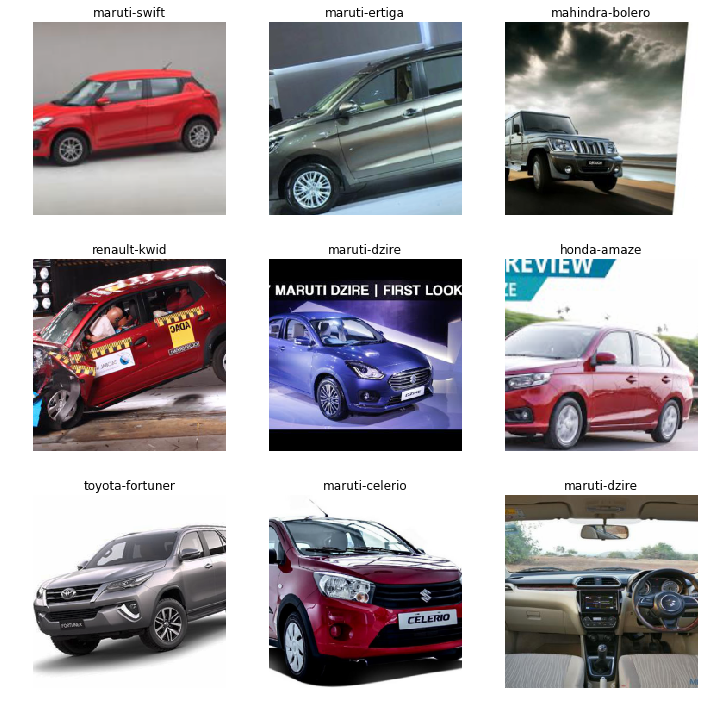

In [8]:
data.show_batch(rows=3, figsize=(10,10))

In [9]:
data.c, len(data.train_ds), len(data.valid_ds)

(20, 1380, 344)

In [10]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


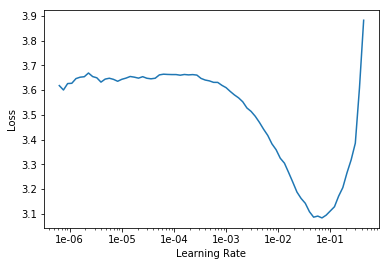

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(5, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy
1,3.087755,2.023962,0.366279
2,2.436376,1.601773,0.520349
3,2.001164,1.490443,0.546512
4,1.686387,1.365822,0.558140
5,1.427247,1.325135,0.590116


In [13]:
learn.save('stage-1-resnet34')

In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


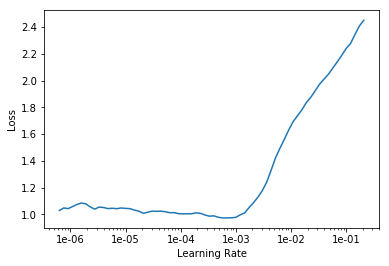

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.994802,1.291170,0.607558
2,0.979060,1.260460,0.607558
3,0.925337,1.256271,0.607558


In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

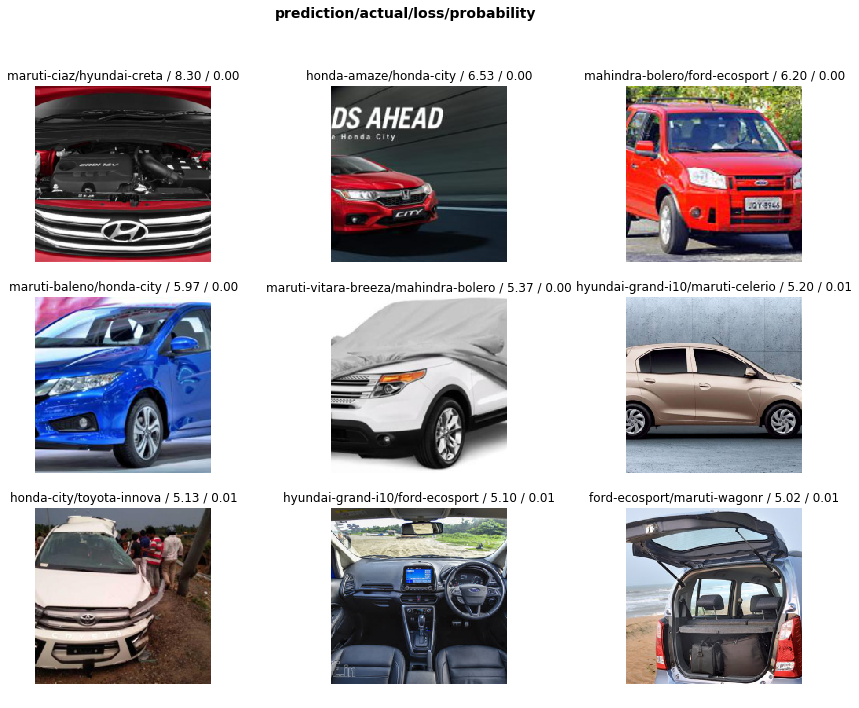

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

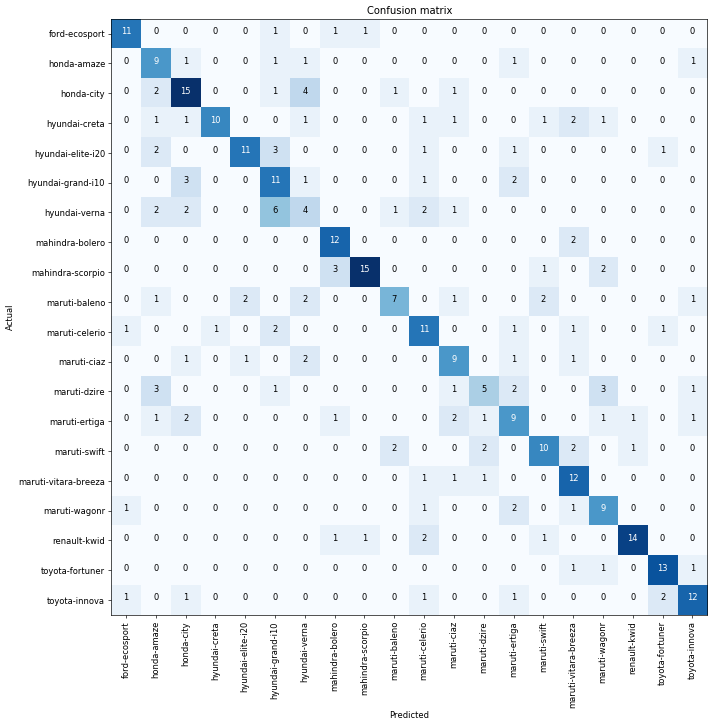

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=2)

[('hyundai-verna', 'hyundai-grand-i10', 6),
 ('honda-city', 'hyundai-verna', 4),
 ('hyundai-elite-i20', 'hyundai-grand-i10', 3),
 ('hyundai-grand-i10', 'honda-city', 3),
 ('mahindra-scorpio', 'mahindra-bolero', 3),
 ('maruti-dzire', 'honda-amaze', 3),
 ('maruti-dzire', 'maruti-wagonr', 3)]

You can run the below step if you want to manually inspect all the images that were misclassified by the classifier. Once you have inspected the images, you can either choose to delete the images or to keep them.

In [21]:
from fastai.widgets import *

In [22]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [23]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [24]:
learn.save('stage-2-resnet34')

### Training with Resnet 50

In [5]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=299, bs=32).normalize(imagenet_stats)

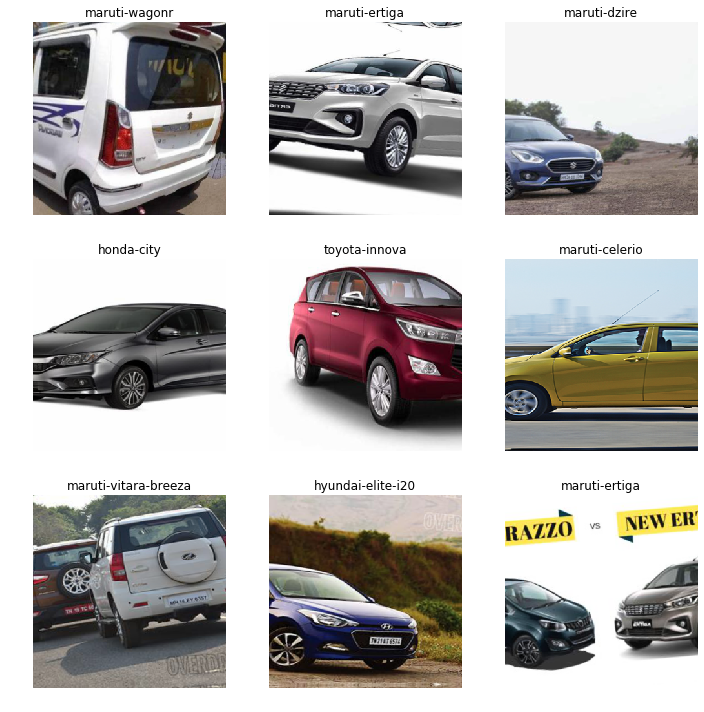

In [6]:
data.show_batch(rows=3, figsize=(10,10))

In [7]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


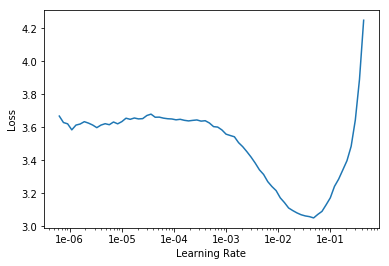

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(5, max_lr=slice(1e-3,3e-2))

epoch,train_loss,valid_loss,accuracy
1,2.484191,2.103638,0.400000
2,2.309843,3.031109,0.394203
3,1.944069,1.874802,0.478261
4,1.548802,1.326152,0.660870
5,1.200770,1.309415,0.666667


In [10]:
learn.save('stage-1-resnet50', return_path=True)

PosixPath('/home/jupyter/work/data/indian-car-classifier/models/stage-1-resnet50.pth')

In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


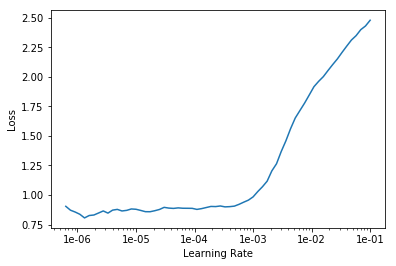

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,accuracy
1,0.843073,1.295879,0.666667
2,0.819765,1.288161,0.655072


In [14]:
learn.save('stage-2-resnet50', return_path=True)

PosixPath('/home/jupyter/work/data/indian-car-classifier/models/stage-2-resnet50.pth')

In [24]:
learn.export()

### Deploying to Production

In [25]:
defaults.device = torch.device('cpu')

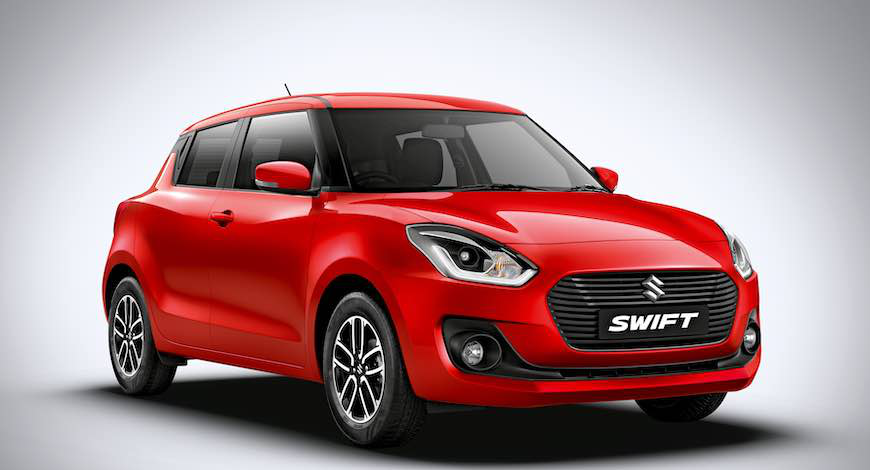

In [26]:
img = open_image(path/'test-images/marutiswift.jpg')
img

In [27]:
learn = load_learner(path)

In [28]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category maruti-swift